# Visualization

In [5]:
import pandas as pd

results_df = pd.read_pickle('results.pickle')
# results_df = results_df[results_df.method != 'mean'].copy()
results_df.head()

,feature,mae,rmse,r2,r2_robust,method,missing_rate,city
0,fsi,0.273148,0.517580,0.362811,0.921932,sknn,0.1,saint_petersburg
1,gsi,0.064920,0.094903,0.434373,0.787671,sknn,0.1,saint_petersburg
2,fsi,0.267258,0.525194,0.343926,0.940148,idw,0.1,saint_petersburg
3,gsi,0.063580,0.095996,0.421266,0.829058,idw,0.1,saint_petersburg
4,fsi,0.439844,0.635910,0.038156,0.231921,smv-nmf,0.1,saint_petersburg


In [8]:
results_df.groupby('method').agg({
    'mae': 'mean',
    'rmse': 'mean',
    'r2': 'mean',
    'r2_robust': 'mean'
})

,mae,rmse,r2,r2_robust
method,,,,
idw,0.171256,0.308547,0.358297,0.885898
sknn,0.173121,0.299097,0.400213,0.860331
sm,0.183672,0.314228,0.340884,0.855627
sm + idw,0.162861,0.273346,0.503835,0.846114
sm + sknn,0.164683,0.271497,0.512046,0.828543
sm + smv-nmf,0.220287,0.329108,0.270808,0.598665
smv-nmf,0.271776,0.376873,0.026389,0.166807


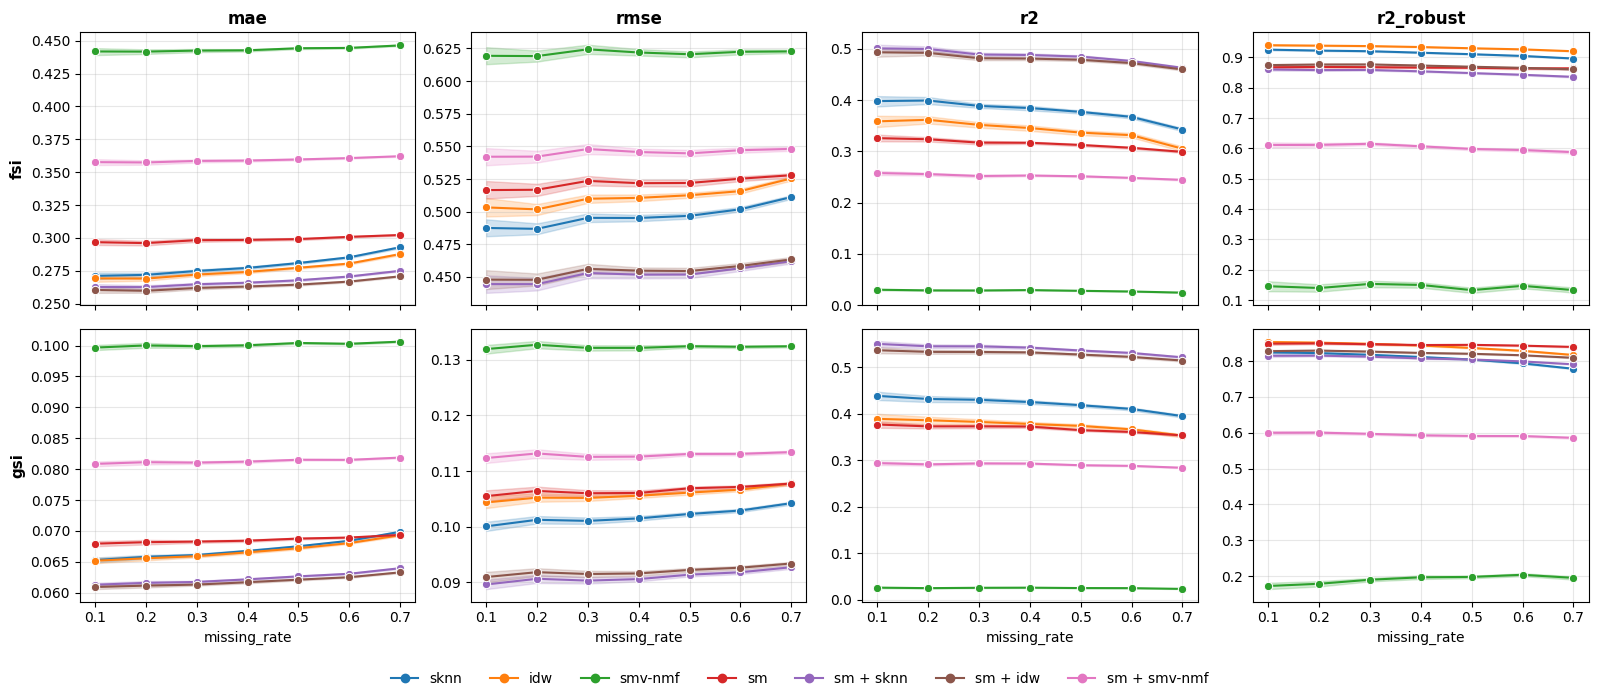

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['mae', 'rmse', 'r2', 'r2_robust']
features = results_df['feature'].unique()
methods = results_df.method.unique()
palette = sns.color_palette("tab10", n_colors=len(methods))

n_rows = len(features)
n_cols = len(metrics)

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(4*n_cols, 3.5*n_rows),
    sharex='col', sharey=False
)

for i, feature in enumerate(features):
    sub = results_df[results_df['feature'] == feature]
    for j, metric in enumerate(metrics):
        ax = axes[i, j] if n_rows > 1 else axes[j]
        sns.lineplot(
            data=sub,
            x='missing_rate',
            y=metric,
            hue='method',
            marker='o',
            ax=ax,
            palette=palette,
            legend=False 
        )
        if i == 0:
            ax.set_title(metric, fontsize=12, weight='bold')
        if j == 0:
            ax.set_ylabel(feature, fontsize=11, weight='bold')
        else:
            ax.set_ylabel('')
        if i != n_rows - 1:
            ax.set_xlabel('')
        ax.grid(True, alpha=0.3)

handles = [plt.Line2D([0], [0], color=palette[i], marker='o', label=meth) 
           for i, meth in enumerate(methods)]
labels = methods
fig.legend(
    handles, labels,
    loc='lower center',
    ncol=len(labels),
    frameon=False
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


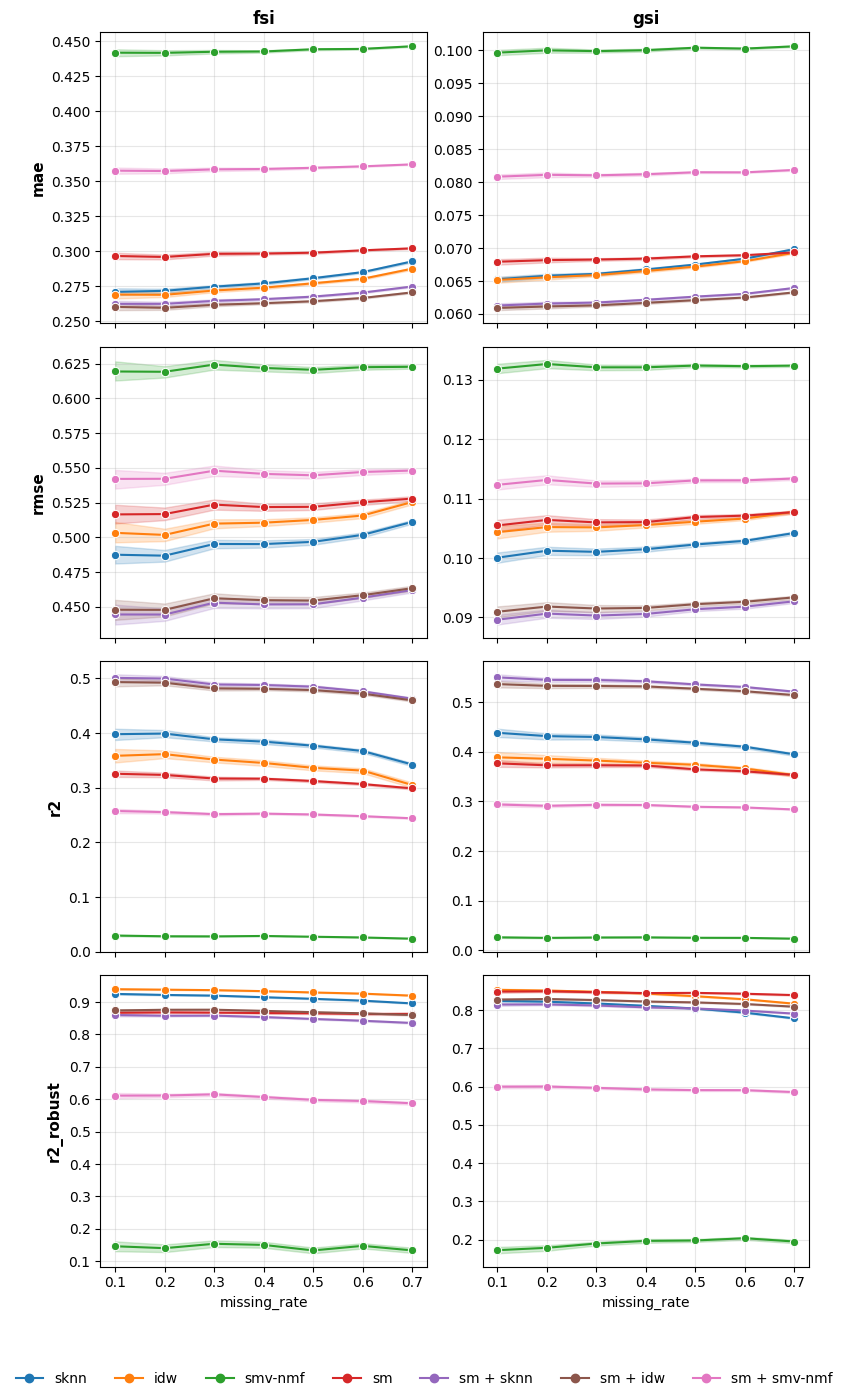

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['mae', 'rmse', 'r2', 'r2_robust']
features = results_df['feature'].unique()
methods = results_df.method.unique()
palette = sns.color_palette("tab10", n_colors=len(methods))

n_rows = len(metrics)
n_cols = len(features)

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(4*n_cols, 3.5*n_rows),
    sharex='col', sharey=False
)

for i, metric in enumerate(metrics):
    for j, feature in enumerate(features):
        ax = axes[i, j] if n_rows > 1 and n_cols > 1 else (axes[j] if n_rows == 1 else axes[i])
        sub = results_df[results_df['feature'] == feature]
        sns.lineplot(
            data=sub,
            x='missing_rate',
            y=metric,
            hue='method',
            marker='o',
            ax=ax,
            palette=palette,
            legend=False 
        )
        if i == 0:
            ax.set_title(feature, fontsize=12, weight='bold') 
        if j == 0:
            ax.set_ylabel(metric, fontsize=11, weight='bold')
        else:
            ax.set_ylabel('')
        if i != n_rows - 1:
            ax.set_xlabel('')
        ax.grid(True, alpha=0.3)

handles = [plt.Line2D([0], [0], color=palette[i], marker='o', label=meth) 
           for i, meth in enumerate(methods)]
labels = methods
fig.legend(
    handles, labels,
    loc='lower center',
    ncol=len(labels),
    frameon=False
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()
